<div style="display: flex; justify-content: flex-start; align-items: center;">
    <a href="https://colab.research.google.com/github/msfasha/307304-Data-Mining/blob/main/20251/Module%206-Time%20Series%20Analysis/time_series_analysis.ipynb" target="_blank">    
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 25px; margin-right: 20px;">
    </a>
</div>

### Time Series Analysis: Theory and Practice with Python

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">What Is a Time Series?</h3>
</div>

A **time series** is a sequence of observations collected **over time**, usually at regular intervals.

Examples:

* Daily stock prices
* Hourly electricity consumption
* Monthly sales revenue
* Sensor measurements every second

Why Time Series Are Different

* Observations are **dependent**
* The order of data points **cannot be shuffled**
* Past values influence future values

This dependency structure is the core challenge of time series analysis.

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Time Series Decomposition</h3>
</div>

A time series can often be expressed as the combination of three interpretable components:

* **Trend** – the long-term direction or movement of the series
* **Seasonality** – systematic, calendar-related patterns that repeat over a fixed period
* **Noise (Residual)** – irregular, unsystematic variation not explained by trend or seasonality

**Additive Decomposition**

Used when seasonal fluctuations are approximately constant over time:  
$
y_t = \text{Trend}_t + \text{Seasonality}_t + \text{Noise}_t
$

**Multiplicative Decomposition**

Used when seasonal effects scale with the level of the series:  
$
y_t = \text{Trend}_t \times \text{Seasonality}_t \times \text{Noise}_t
$

**Practical Interpretation**

* Additive models assume **independent component magnitudes**
* Multiplicative models assume **proportional interactions** between components
* Taking logarithms converts the multiplicative form into an additive one, simplifying estimation:
  $
  \log(y_t) = \log(\text{Trend}_t) + \log(\text{Seasonality}_t) + \log(\text{Noise}_t)
  $

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Python Example: Decomposition</h3>
</div>

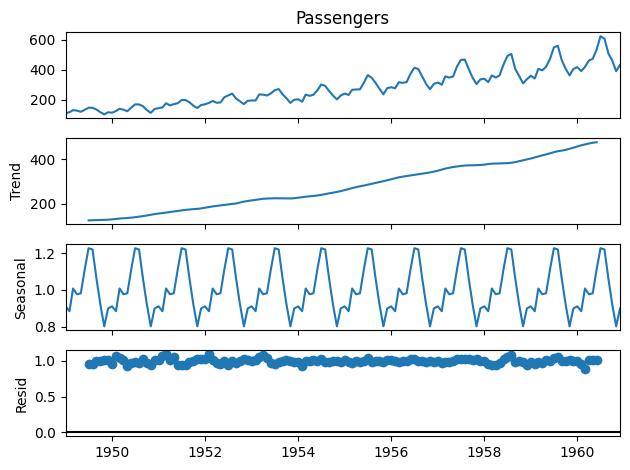

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load example data, the parse_dates and index_col arguments ensure the data is loaded as a time series
# The parse_dates argument ensures the data is loaded as a datetime object, and the index_col argument ensures the data is loaded as a time series 
data = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
    parse_dates=["Month"],
    index_col="Month"
)

# Decompose
decomposition = seasonal_decompose(data["Passengers"], model="multiplicative")

# Plot
decomposition.plot()
plt.show()

**Why this matters**

* Makes patterns visible
* Makes seasonality explicit
* Separates structure from noise
* Helps decide which model to use

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Stationarity (Critical Concept)</h3>
</div>

Many statistical models assume **stationarity**.

A time series is stationary if:

* Mean is constant over time
* Variance is constant
* Autocorrelation structure is stable

**Why Stationarity Matters**

Many statistical models assume stable statistical properties.
Without stationarity:

* Model parameters become unreliable
* Forecasts degrade quickly

Visual Example

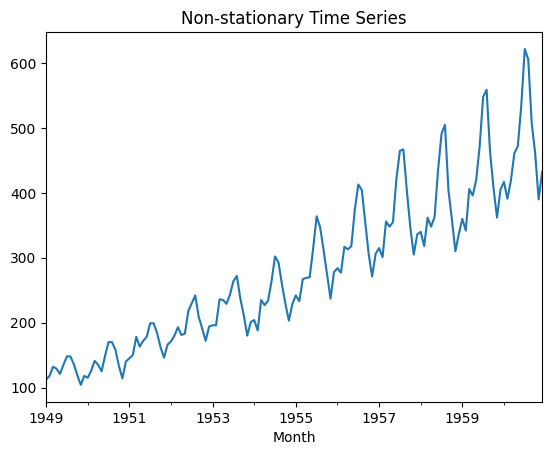

In [4]:
data["Passengers"].plot(title="Non-stationary Time Series")
plt.show()

Based on the plot, the time series data shows a clear upward trend, with some seasonal variations. The data also shows some volatility, with some periods of high volatility and some periods of low volatility.

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Differencing to Achieve Stationarity</h3>
</div>


Differencing is a common technique used in time series analysis to remove trends and seasonality from the data. It returns a new series by subtracting the previous value from the current value.  
For example, if the series is [1, 2, 3, 4, 5], then the differenced series is [1, 1, 1, 1]

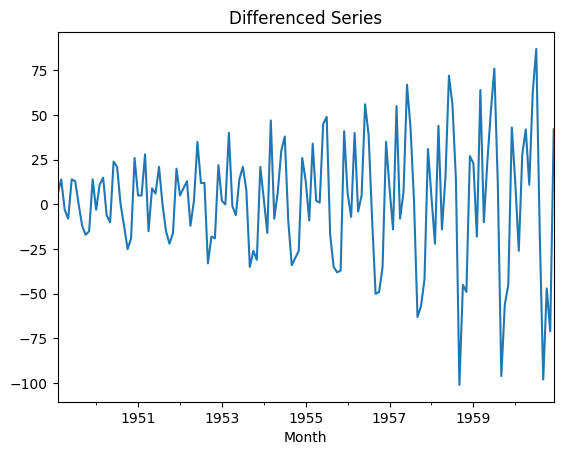

In [ ]:
diff_series = data["Passengers"].diff().dropna()

diff_series.plot(title="Differenced Series")
plt.show()

The plot after differencing shows a little more stable pattern in terms of the mean, which is a characteristic of a stationary time series, but the variance is unstable i.e. increasing, which might require additional transformation e.g. log transform, we will leave that for now.

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Understanding Temporal Dependence in Time Series <br> Autocorrelation and Partial Autocorrelation</h3>
</div>

* Unlike cross-sectional data, **time series observations are ordered and interdependent**
* Past values often influence current behavior due to:

  * Momentum and inertia
  * Cycles and seasonality
  * Structural persistence
* Before building forecasting models, we must **quantify how the past relates to the present**

**Auto Correlation Function ACF and Partial Auto Correlation Function PACF are the primary tools used for this purpose.**

**Motivation for ACF and PACF**

* Raw time series plots show *patterns*, but not **lag-by-lag dependence**
* We need systematic tools to answer:

  * *Does the series depend on its past?*
  * *How far back does this dependence persist?*
  * *Which lags matter directly vs. indirectly?*

**ACF and PACF provide a concise, visual summary of these relationships.**


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Autocorrelation Function (ACF)</h3>
</div>

The **ACF** measures how strongly a time series is correlated with **its own past values**.

At lag (k):

$
\text{ACF}(k) = \text{corr}(y_t, y_{t-k})
$

Intuition

* “How much does today look like *k* periods ago?”
* Measures **total correlation**, including indirect effects

Python Example

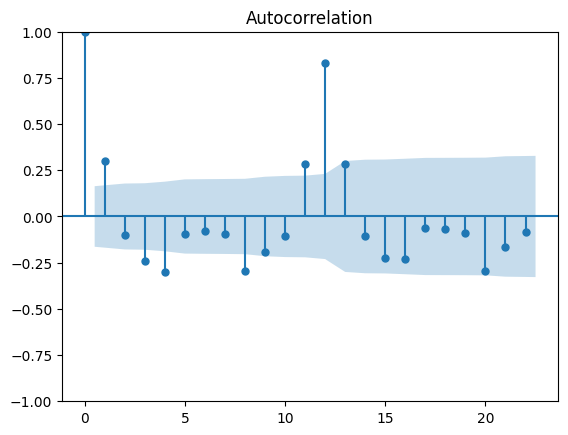

In [32]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diff_series)
plt.show()

How to Interpret ACF

| Pattern                  | Interpretation           |
| ------------------------ | ------------------------ |
| Slow decay               | Series is non-stationary |
| Sharp cutoff after lag q | MA(q) process            |
| Spikes at seasonal lags  | Seasonal MA component    |
| All values near zero     | White noise              |

Key Insight: ACF is primarily used to identify the **MA (Moving Average)** part of ARIMA.

The chart shows the following:

* The **significant spike at lag 1** suggests a **non-seasonal AR(1)** or **MA(1)** component may be useful.
* The **strong spike at lag 12** clearly indicates the need for a **seasonal component** (seasonal differencing and/or seasonal AR/MA terms).
* The slow decay and multiple significant lags imply the series is **not stationary**, so **differencing is required** before fitting ARIMA.

In practice, this ACF supports using a **SARIMA model** rather than a plain ARIMA, with **d = 1** and **D = 1 (seasonal period = 12)** as a starting point.


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Partial Autocorrelation Function (PACF)</h3>
</div>

What PACF Measures

The **PACF** measures the **direct** relationship between (y_t) and (y_{t-k}), **removing the influence of intermediate lags**.

Intuition

* “Does lag k matter *on its own*, or only because of closer lags?”

Python Example

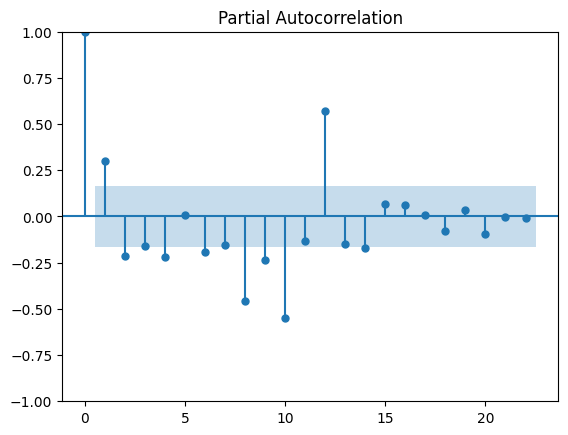

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(diff_series)
plt.show()

How to Interpret PACF

| Pattern                  | Interpretation        |
| ------------------------ | --------------------- |
| Sharp cutoff after lag p | AR(p) process         |
| Gradual decay            | MA behavior           |
| Seasonal spikes          | Seasonal AR component |

Key Insight: PACF is primarily used to identify the **AR (Autoregressive)** part of ARIMA.


The chart shows the following:

* **PACF of the differenced series** is informative for ARIMA specification:
* **Lag 1 is significant** → supports a **non-seasonal AR(1)** term.
* **Lag 12 is strongly significant** → supports a **seasonal AR(1)** term with period 12.
* Most other lags fall within the confidence band → higher-order AR terms are likely unnecessary.

**Implication:**
A reasonable starting model is **SARIMA(1,1,0)(1,1,0)[12]** (or test nearby variants with a seasonal MA term if needed).


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Why ACF and PACF Are Different (Critical Understanding)</h3>
</div>

* **ACF** includes **direct + indirect** correlations
* **PACF** isolates **direct** correlations only

Example:
If:

* $(y_t)$ depends on $(y_{t-1})$
* $(y_{t-1})$ depends on $(y_{t-2})$

Then:

* ACF at lag 2 may be high
* PACF at lag 2 may be near zero

This distinction is what allows AR and MA terms to be identified separately.

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Summary</h3>
</div>

* **ACF** shows how similar the current month is to past months.
  → Strong spikes, especially at **12 months**, mean the data has a **clear yearly seasonal pattern**.
  → Correlations stay high for many lags, showing the series has a **trend** and is **not stationary**.

* **PACF** shows which past months **directly influence** the current month.
  → A strong spike at **lag 1** means this month depends on **last month**.
  → A strong spike at **lag 12** means this month also depends on **the same month last year**.

* **What we learn from both plots:**
  Passenger numbers depend on **recent history (last month)** and **seasonal history (last year)**.

* **Why SARIMA is a good choice:**
  SARIMA is built for time-series data that has a **trend** and **repeating seasonal patterns**.
  It can handle both **short-term changes** and **yearly seasonality**, which is exactly what the ACF and PACF plots reveal in the AirPassengers dataset.


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">CLASSICAL STATISTICAL MODELS<br>ARIMA MODELS</h3>
</div>

ARIMA models are a foundational class of methods for analyzing and forecasting time series data when observations are dependent over time. 

Unlike standard regression approaches, ARIMA explicitly models temporal structure by allowing the current value of a series to depend on its own past values and past random shocks.

The framework combines three ideas:
- The autoregressive (AR) component captures persistence by relating the present to previous observations. 
- The moving average (MA) component models how past forecast errors propagate forward. 
- The integrated (I) component addresses non-stationarity by differencing the series to remove trends or stochastic drift. 
  
Together, these elements provide a flexible yet interpretable way to represent a wide range of time series behaviors.

ARIMA is typically applied in a diagnostic-driven workflow: 
- The series is first explored and transformed to achieve stationarity, then its dependence structure is examined—often using ACF and PACF plots—to guide model specification. 
- The emphasis is on parsimony and interpretability rather than black-box prediction, making ARIMA a standard baseline in time series analysis and forecasting.

### Model Structure

ARIMA(p, d, q)

| Parameter | Meaning      | How Chosen        |
| --------- | ------------ | ----------------- |
| p         | AR terms     | From PACF         |
| d         | Differencing | From stationarity |
| q         | MA terms     | From ACF          |

p = 2 means we need to use the last 2 data points to predict the next data point  
d = 1 means we need to difference the data once, for example if we have 100 data points, we will have 99 data points after differencing  
q = 2 means we need to use the last 2 data points to predict the next data point

### Mathematical Form

$y_t = c + \sum_{i=1}^{p} \phi_i y_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \varepsilon_t$

This equation shows that the current value $y_t$ is made up of:
- a constant term (c), plus a contribution from **past values** of the series $(\sum_{i=1}^{p}\phi_i,y_{t-i})$ (where $(y_{t-i})$ are earlier observations and $(\phi_i)$ are their weights)
- a contribution from **past errors/shocks** $(\sum_{j=1}^{q}\theta_j,\varepsilon_{t-j})$ (where $(\varepsilon_{t-j})$ are previous forecast errors and $(\theta_j)$ are their weights)
- and finally the **current random noise** $(\varepsilon_t)$. 

This structure aligns with what we see in the ACF and PACF plots—dependence on recent history (e.g., lag 1) and seasonal repetition (e.g., lag 12)—which is why a seasonal extension such as SARIMA is appropriate for the AirPassengers series.


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Python Example</h3>
</div>

The code below shows the application of an **ARIMA(2,1,2)** model to the AirPassengers time series. 

The model first applies one level of differencing to remove the overall upward trend and achieve approximate stationarity. 

It then captures short-term dependencies by modeling the influence of passenger counts from the previous two months (autoregressive terms) and the impact of recent shocks or errors from the past two periods (moving-average terms). 

This approach focuses on modeling non-seasonal, month-to-month dynamics in the data and does not explicitly account for the strong yearly seasonal pattern characteristic of the AirPassengers series.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model with ar =2, d=1, ma=2
model = ARIMA(data["Passengers"], order=(2,1,2))
model_fit = model.fit()

print(model_fit.scummary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 16 Dec 2025   AIC                           1353.347
Time:                        23:10:20   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.798      0.0

c:\Users\me\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\me\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\me\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\me\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**What this *really* is (in one sentence)**

**ARIMA is just regression on time**, where the predictors are **past values and past errors instead of columns in a table**.

**Connect it to regular regression (intuition first)**

In ordinary regression you write:

> y = β₀ + β₁x₁ + β₂x₂ + error

In ARIMA, you write:

> yₜ = constant + (past y’s) + (past errors) + error

Same idea. Different inputs.

**Translate the output into regression language**

**1. The coefficients (`ar.L1`, `ar.L2`, `ma.L1`, `ma.L2`)**

These are just **regression coefficients**.

* `ar.L1 = 1.685`
  → “Last month strongly predicts this month”

* `ar.L2 = -0.955`
  → “Two months ago has a correcting (negative) effect”

* `ma.L1` and `ma.L2`
  → “If the model made errors recently, those errors help adjust today’s prediction”

This is no different from saying:

> feature₁ coefficient = 1.68
> feature₂ coefficient = −0.95

The “features” just happen to be **lags of the same variable**.

**2. p-values and z-scores**

Exactly the same as regression:

* Low p-value → coefficient matters
* High p-value → coefficient doesn’t matter

Here, all p-values ≈ 0 → **the model found strong structure in time**.

**3. Residual diagnostics = model sanity checks**

Think of these as **post-fit validation**, not magic.

* **Ljung–Box**
  → “Did we leave obvious patterns behind?”
  (No → good)

* **Jarque–Bera**
  → “Do residuals look roughly normal?”
  (Yes → OK)

* **Heteroskedasticity test**
  → “Does variance change over time?”
  (Yes → data grows over time, known issue with AirPassengers)

Same role as:

* residual plots
* normality checks
* constant variance checks

Why it *feels* alien

1. **No feature matrix**

   * Features are created internally from time lags.

2. **Statistical language**

   * Econometrics emphasizes inference, not prediction accuracy.

3. **Diagnostics-heavy**

   * Much more focus on *why* a model works than ML usually gives.

**How this fits into machine learning**

ARIMA is:

* ✔ supervised learning
* ✔ parametric
* ✔ linear model
* ✔ maximum likelihood–based

It sits closer to:

* linear regression
* ridge regression
* Kalman filters

than to:

* neural networks
* random forests

**One grounding sentence you can remember**

> ARIMA is just linear regression where the predictors are the past of the same variable, and the output is wrapped in statistical diagnostics instead of ML metrics.

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Forecasting with ARIMA</h3>
</div>

The code below uses the fitted ARIMA model to generate a 12-month forecast of airline passenger numbers and then visualizes the results. 

The historical observations are plotted alongside the model’s out-of-sample predictions to show how the learned time-series patterns are extrapolated into the future. 

This comparison helps assess how well the model captures the overall trend and highlights any limitations, such as the absence of explicit seasonal behavior in the forecast.


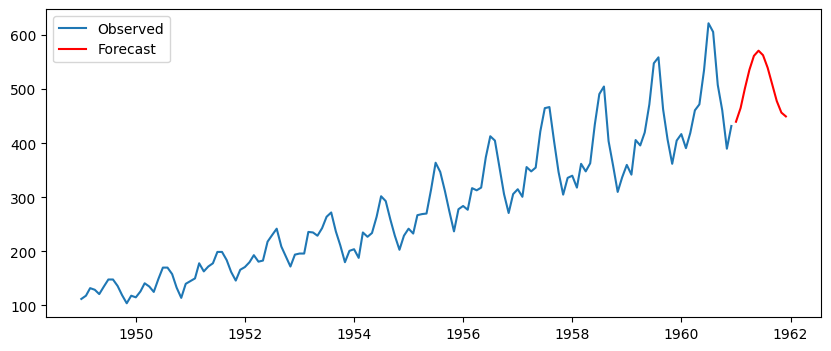

In [35]:
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(10,4))
plt.plot(data.index, data["Passengers"], label="Observed")
plt.plot(forecast.index, forecast, label="Forecast", color="red")
plt.legend()
plt.show()

The forecast shows that the ARIMA model captures the overall upward trend in passenger numbers, but because it does not include seasonal components, it fails to reproduce the strong yearly fluctuations present in the data.

What this tells you scientifically
- The model is not wrong
- It is simply incomplete for this dataset
- The plot visually proves why seasonal models (SARIMA) or log-transformed models are more appropriate for AirPassengers

**ARIMA Strengths**

* Interpretable
* Statistically grounded

**ARIMA Limitations**

* **No built-in seasonality**
  Standard ARIMA does not explicitly model repeating seasonal patterns (e.g., yearly or weekly cycles). Seasonal effects must be handled through preprocessing or by using a seasonal extension such as **SARIMA**.

* **Linear model**
  Assumes linear relationships between past values and errors.

* **Sensitive to assumptions**
  Requires correct differencing and approximate stationarity.

* **Limited handling of external variables**
  Does not naturally incorporate many exogenous factors (e.g., holidays, promotions) without extensions like **ARIMAX/SARIMAX**.

Simple one-line takeaway

> ARIMA is effective for trend and short-term dynamics but is limited when strong seasonal patterns or external drivers are present.


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Full Code Example</h3>
</div>

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Split the time series into training and testing sets
# -----------------------------------------------
# data["Passengers"] is a time-ordered series (earliest → latest)
#
# [: -12]  → selects all observations EXCEPT the last 12
#            This is the training data used to fit the ARIMA model
#
# [-12 :]  → selects ONLY the last 12 observations
#            These are held-out values used to evaluate forecast accuracy
#
# We use the last 12 points because we want to test how well the model
# predicts 12 future periods (e.g., 12 months) it has not seen before

train = data["Passengers"][:-12]   # historical data for model training
test = data["Passengers"][-12:]    # actual future values for accuracy evaluation

# fit ARIMA model
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

# forecast
forecast = model_fit.forecast(steps=12)

# accuracy metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# plot
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(forecast.index, forecast, label="Forecast", color="red")
plt.legend()
plt.show()


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Seasonal ARIMA (SARIMA)</h3>
</div>

The code below fits a SARIMA model to the AirPassengers time series in order to capture both non-seasonal and seasonal patterns in the data. 

The non-seasonal component ((1,1,1)) models short-term month-to-month dependence after removing the overall trend through differencing, while the seasonal component ((1,1,1,12)) explicitly models yearly seasonality with a 12-month period. 

By combining these components, the SARIMAX framework allows the model to account for trend, short-term dynamics, and recurring annual fluctuations, providing a more appropriate representation of the AirPassengers series than a non-seasonal ARIMA model.

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    data["Passengers"],
    order=(1,1,1), 
    seasonal_order=(1,1,1,12)
)

fit = model.fit()
fit.summary()

c:\Users\me\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\me\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Tue, 16 Dec 2025   AIC                           1022.299
Time:                                    23:28:55   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2149      0.325     -0.660      0.509      -0.853       0.423
ar.S.L12      -0.9272      0.214     -4.341      0.000      -1.346      -0.509
ma.S.L12       0.8394      0.309      2.717      0.007       0.234       1.445
sigma2       130.7826     15.420      8.481      0.000     100.559     161.006
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.05
Prob(Q):                              0.99   Prob(JB):                         0.03
Heteroskedasticity (H):               2.65   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

These SARIMAX results show that the model successfully captures the **seasonal structure** of the AirPassengers data. 

The **seasonal autoregressive (AR.S.12)** and **seasonal moving-average (MA.S.12)** terms are statistically significant, confirming a strong yearly dependency, while the non-seasonal AR and MA terms are not significant, indicating that most of the explanatory power comes from the seasonal component rather than short-term month-to-month effects. 

The low AIC value reflects an improved fit compared to a non-seasonal ARIMA model, and the Ljung–Box test suggests no remaining autocorrelation in the residuals. 

Overall, this confirms that explicitly modeling seasonality is critical for accurately representing the AirPassengers time series.


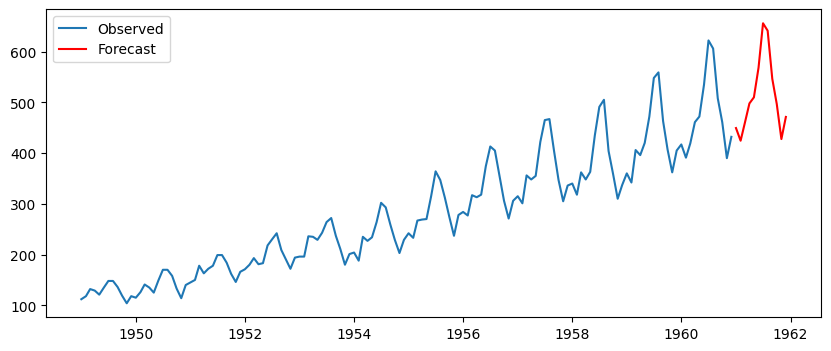

In [15]:
forecast = fit.forecast(steps=12)

plt.figure(figsize=(10,4))
plt.plot(data.index, data["Passengers"], label="Observed")
plt.plot(forecast.index, forecast, label="Forecast", color="red")
plt.legend()
plt.show()

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">PART II — MACHINE LEARNING APPROACHES</h3>
</div>

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Why Machine Learning for Time Series?</h3>
</div>

Statistical models:

* Focus on *past values only*
* Require strong assumptions

ML models:

* Handle non-linearity
* Incorporate many features
* Scale well with data

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Feature Engineering for ML</h3>
</div>

ML models **do not understand time**.
Time information must be converted into features.

### Lag Features

In [17]:
df = data.copy()

df["lag_1"] = df["Passengers"].shift(1)
df["lag_12"] = df["Passengers"].shift(12)

df.dropna(inplace=True)

Display new dataframe with lags

In [20]:
df

,Passengers,lag_1,lag_12
Month,,,
1950-01-01,115,118.0,112.0
1950-02-01,126,115.0,118.0
1950-03-01,141,126.0,132.0
1950-04-01,135,141.0,129.0
1950-05-01,125,135.0,121.0
...,...,...,...
1960-08-01,606,622.0,559.0
1960-09-01,508,606.0,463.0
1960-10-01,461,508.0,407.0


Train-Test Split (Time-Aware)

In [ ]:
train = df.iloc[:-12] # All data except last 12 months
test = df.iloc[-12:] # last 12 months for testing

X_train = train.drop("Passengers", axis=1) # Drop the target column
y_train = train["Passengers"] # Target column

X_test = test.drop("Passengers", axis=1)
y_test = test["Passengers"]

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Regression Model (Baseline ML)</h3>
</div>

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

Plot the actual vs predicted values

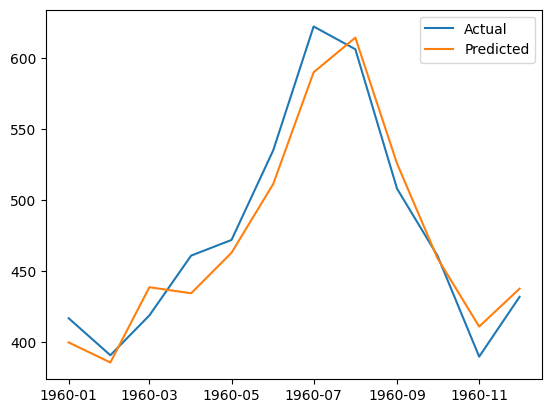

In [22]:
plt.plot(test.index, y_test, label="Actual")
plt.plot(test.index, predictions, label="Predicted")
plt.legend()
plt.show()

Evaluate the performance of the model

In [29]:
import numpy as np

# Compute R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2:.4f}')

# Compute RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse:.4f}')

R-squared: 0.9406
RMSE: 18.1356


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Tree-Based Models (Nonlinear Patterns)</h3>
</div>

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

Plot the time series data

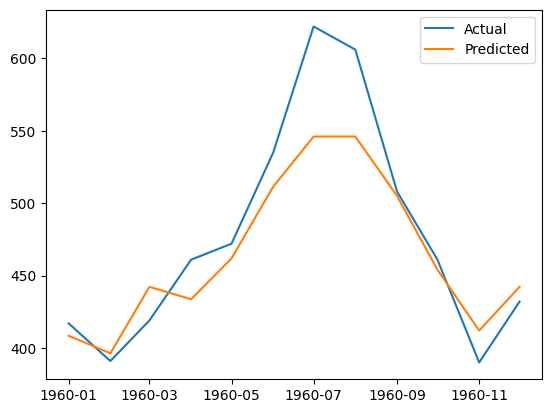

In [25]:
plt.plot(test.index, y_test, label="Actual")
plt.plot(test.index, rf_preds, label="Predicted")
plt.legend()
plt.show()

Evaluate the performance of the model

In [28]:
import numpy as np

# Compute R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, rf_preds)
print(f'R-squared: {r2:.4f}')

# Compute RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f'RMSE: {rmse:.4f}')


R-squared: 0.8184
RMSE: 31.7142


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Gradient Boosting (XGBoost-style Logic)</h3>
</div>

Gradient Boosting Regressor

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_preds = gbr.predict(X_test)

import numpy as np

# Compute R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, gbr_preds)
print(f'R-squared: {r2:.4f}')

# Compute RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, gbr_preds))
print(f'RMSE: {rmse:.4f}')

R-squared: 0.8396
RMSE: 29.8079


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Comparing Models</h3>
</div>

In [31]:
from sklearn.metrics import mean_absolute_error

print("Linear:", mean_absolute_error(y_test, predictions))
print("RF:", mean_absolute_error(y_test, rf_preds))
print("GBR:", mean_absolute_error(y_test, gbr_preds))

Linear: 15.640331783370726
RF: 23.024166666666677
GBR: 24.80970757043872


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">DEEP LEARNING (CONCEPTUAL)</h3>
</div>

Recurrent Neural Networks (LSTM)

Deep learning models:

* Learn sequences directly
* Capture long-term dependencies

Key requirements:

* Large datasets
* Careful scaling
* Computational resources

Typical workflow:

1. Window the series
2. Normalize
3. Train LSTM
4. Forecast iteratively

(Implementation usually done with TensorFlow or PyTorch.)

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Statistical vs ML: When to Use What</h3>
</div>

| Scenario                        | Best Approach      |
| ------------------------------- | ------------------ |
| Small dataset, interpretability | ARIMA / SARIMA     |
| Strong seasonality              | SARIMA             |
| Many external variables         | ML                 |
| Non-linear patterns             | Tree models        |
| Large-scale forecasting         | ML / Deep Learning |
| Regulatory / explainable needs  | Statistical        |

Key Takeaways

* Time series analysis is about **structure + dependency**
* Statistical models explain *why*
* ML models focus on *accuracy*
* Feature engineering is essential for ML
* No single model is universally best